<a href="https://colab.research.google.com/github/kelszn/kelszn/blob/main/Ai_clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment By Mac-Donald Chidubem Udoye

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # to scale and Normalize our dataset
from sklearn.cluster import KMeans #for the cluster algorithm


In [8]:
#import dataset from excel in xlsx
from google.colab import drive
drive.mount('/drive')



Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [21]:
#read file
file_path = '/drive/MyDrive/Data/survey_results.xlsx'

student_df = pd.read_excel(file_path)

student_df.set_index('name', inplace=True)
student_df

,screen_time,exercise_hours,sleep_hours,work_hours
name,,,,
Nikolos,6,7.0,7,18
Warisara,5,3.0,7,10
mikhail,5,6.0,9,15
Walter White,6,0.5,7,20
Charity,14,0.0,5,20
Nur,7,5.0,7,0
Oleksandr,6,8.0,8,18
Samuel,5,9.0,5,20
Agustin,5,4.0,7,0


In [23]:
#Normalize the data
#standard scalar: (x - mean)/ std

scaler = StandardScaler()
x = scaler.fit_transform(student_df)
print(x)
print(student_df)

[[-0.19389168  0.86840753  0.08804509  0.65660997]
 [-0.58167505 -0.49380036  0.08804509 -0.41540631]
 [-0.58167505  0.52785556  1.8489469   0.25460386]
 [-0.19389168 -1.34518029  0.08804509  0.92461404]
 [ 2.90837525 -1.51545627 -1.67285672  0.92461404]
 [ 0.19389168  0.18730358  0.08804509 -1.75542665]
 [-0.19389168  1.2089595   0.968496    0.65660997]
 [-0.58167505  1.54951147 -1.67285672  0.92461404]
 [-0.58167505 -0.15324839  0.08804509 -1.75542665]
 [-0.19389168 -0.83435233  0.08804509 -0.41540631]]
              screen_time  exercise_hours  sleep_hours  work_hours
name                                                              
Nikolos                 6             7.0            7          18
Warisara                5             3.0            7          10
mikhail                 5             6.0            9          15
Walter White            6             0.5            7          20
Charity                14             0.0            5          20
Nur                 

In [24]:
#Elbow method to determine the optimal k value of clusters
#wscc means "within-clusters sum of squares"
wcss = []
for i in range(1, 11):
    k_means= KMeans(n_clusters= i, random_state=0)
    k_means.fit(x) #fit kmeans Algo to the data
    wcss.append(k_means.inertia_)

wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[40.0,
 23.99042771508188,
 14.605933999630693,
 8.854116931634223,
 4.013678333725291,
 2.4689342708484,
 0.9375002165206552,
 0.491915494738586,
 0.13317579248207495,
 0.0]

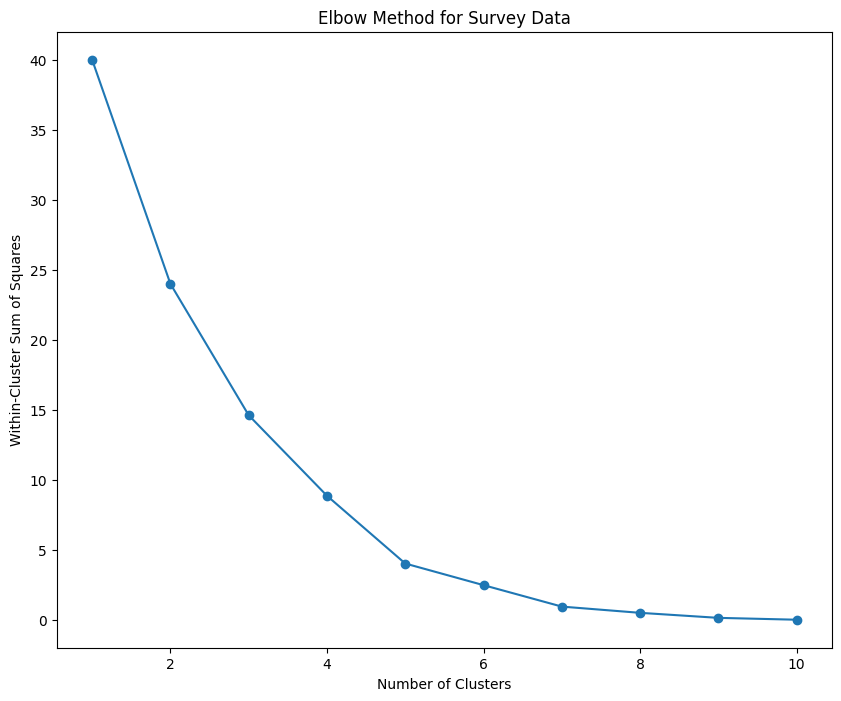

In [25]:
#visulize the elbow method result see clearly
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11),wcss, marker = 'o')
plt.title('Elbow Method for Survey Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [76]:
#Apply Kmeans clustering now for k=5 or k=6
optimal_k = 6
k_means = KMeans(n_clusters= optimal_k, random_state=0)
clusters = k_means.fit_predict(x)

clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 5, 4, 2, 1, 0, 3, 1, 4], dtype=int32)

In [77]:
#Add clusters to the DataFrame
student_df['clusters'] = clusters
student_df

,screen_time,exercise_hours,sleep_hours,work_hours,clusters
name,,,,,
Nikolos,6,7.0,7,18,0
Warisara,5,3.0,7,10,4
mikhail,5,6.0,9,15,5
Walter White,6,0.5,7,20,4
Charity,14,0.0,5,20,2
Nur,7,5.0,7,0,1
Oleksandr,6,8.0,8,18,0
Samuel,5,9.0,5,20,3
Agustin,5,4.0,7,0,1


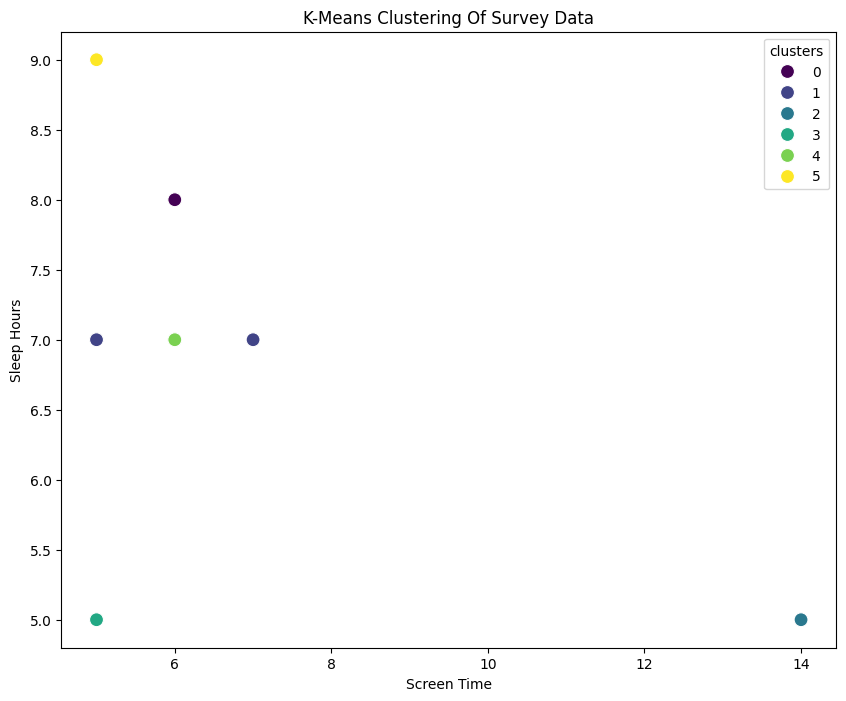

In [78]:
#visualization in scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='screen_time', y= 'sleep_hours', hue='clusters', data=student_df, palette='viridis', s= 100)
plt.title('K-Means Clustering Of Survey Data')
plt.xlabel('Screen Time')
plt.ylabel('Sleep Hours')
plt.show()

In [80]:
#visualization in Heatmap
row_ann = pd.DataFrame({'k_means':['C'+ str(label+1) for label in clusters]}, index = student_df.index)
#reorder
order = np.argsort(clusters)
x_ordered = x[order]
row_ann_ordered = row_ann.iloc[order]

#result
row_ann_ordered



,k_means
name,
Nikolos,C1
Oleksandr,C1
Nur,C2
Agustin,C2
Charity,C3
Samuel,C4
Warisara,C5
Walter White,C5
Tora,C5


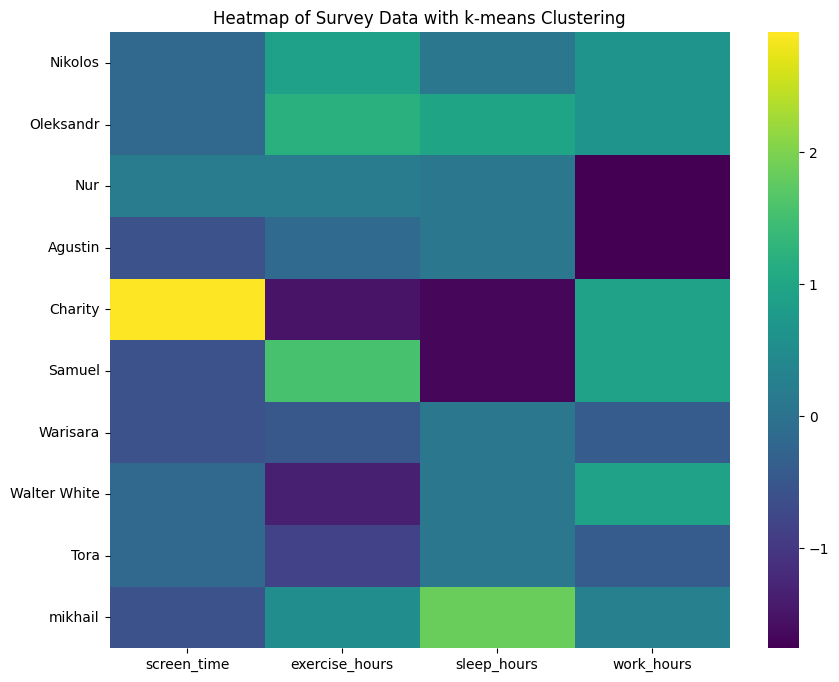

In [81]:
#plot Heatmap
fig, ax = plt.subplots(figsize =(10,8))
sns.heatmap(x_ordered, annot=False, cmap='viridis', xticklabels = student_df.columns[:-1], yticklabels = row_ann_ordered.index, ax= ax)
for ytick, label in zip(ax.get_yticks(), row_ann_ordered['k_means']):
 ax.text(x_ordered.shape[1], ytick, label, horizontalalignment = 'left', verticalalignment = 'center', fontsize = 10, color = 'white')

plt.title('Heatmap of Survey Data with k-means Clustering')
plt.show()

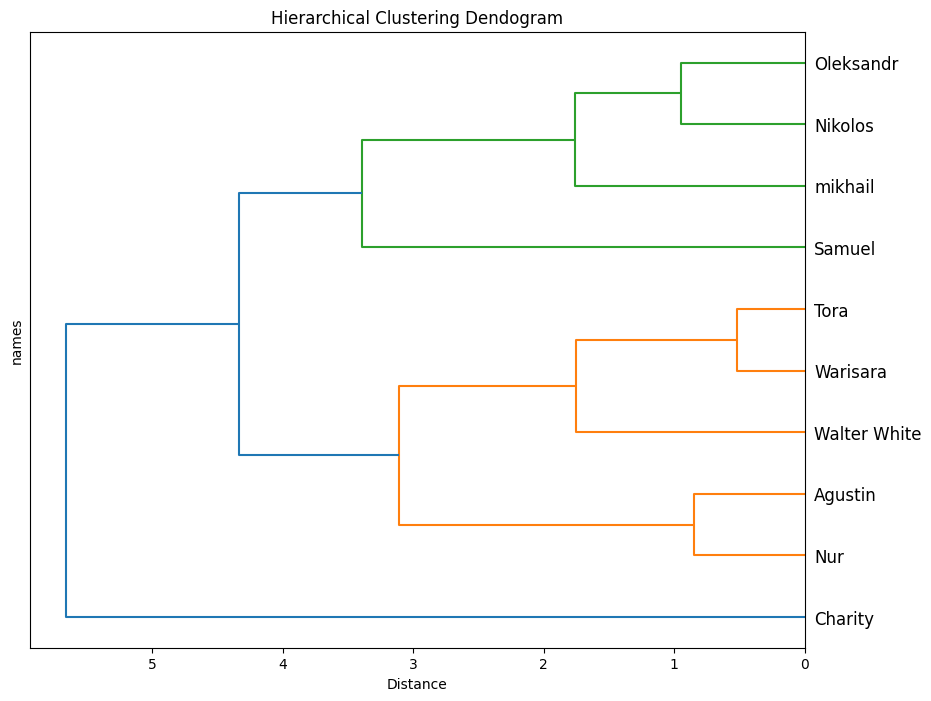

In [82]:
# Hierarchical Clustering
# we need to have here:
# Imported Libraries
# Data Frame with data
# Scaled data in data frame and array X

# Import libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Compute the distance matrix
distance_matrix = pdist(x, metric = 'euclidean')

# Hierarchical clustering
# ward minimizes the within-cluster variance
Z = linkage(x, method = 'ward')

# plot the dendogram
plt.figure(figsize=(10,8))
dendrogram(Z, labels = student_df.index, orientation = 'left' )
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Distance')
plt.ylabel('names')
plt.show()